# Time Series Analysis 

### Pandas for Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
students = pd.DataFrame({
    "Phone":["555-2222","133-2221","222-1332","344-1232"],
    "age":[17,20,19,20]
},index=["Tom","Bob","Kith","peter"])
students

,Phone,age
Tom,555-2222,17
Bob,133-2221,20
Kith,222-1332,19
peter,344-1232,20


In [3]:
students.index # We will use indexes by time

Index(['Tom', 'Bob', 'Kith', 'peter'], dtype='object')

### Creating Dataframe using numpy

In [4]:
df = pd.DataFrame(np.random.randn(6,4),
                  index=['Jenny','Deepak','Rohan','Kevin','Vikas','Kumar'],
                  columns=list('ABCD'))
df

,A,B,C,D
Jenny,0.481682,0.555864,-0.351032,-1.226373
Deepak,-0.224895,-0.054813,0.638486,1.563837
Rohan,-0.361812,-1.295954,-0.618962,1.791185
Kevin,-0.674325,-0.275293,-1.607384,-1.249793
Vikas,-0.731813,-1.363932,1.293016,0.411357
Kumar,-0.037190,0.861368,0.384300,0.287710


Series - Functionality of a data frame in case of 1 - D dataset

In [5]:
series = pd.Series([1,2,4,np.nan,7,8])

In [6]:
series.index=['a','b','c','d','e','f']
series

a    1.0
b    2.0
c    4.0
d    NaN
e    7.0
f    8.0
dtype: float64

In [7]:
series.isnull()

a    False
b    False
c    False
d     True
e    False
f    False
dtype: bool

#### Dataframe and series with ploting

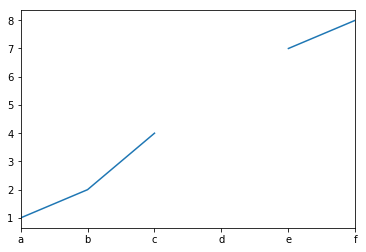

In [8]:
series.plot()

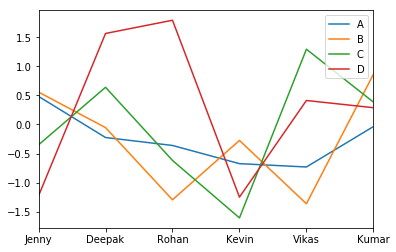

In [9]:
df.plot()

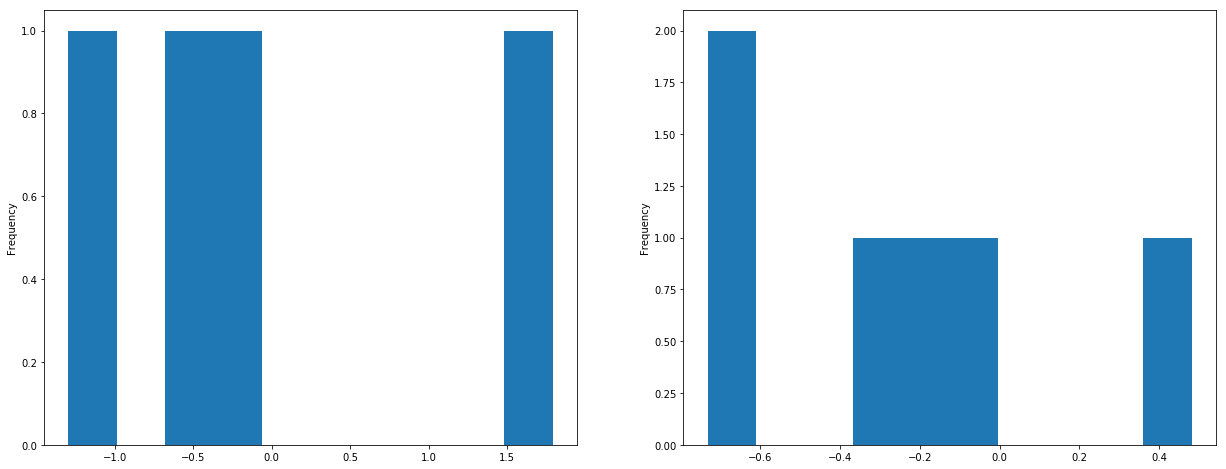

In [10]:
fig = plt.figure(figsize=(21,8))

plt.subplot2grid((1,2),(0,0))
df.loc['Rohan',].plot(kind='hist')
plt.subplot2grid((1,2),(0,1))
df['A'].plot(kind='hist')

#### Accessing the elements

In [11]:
series[series.index>'c']

d    NaN
e    7.0
f    8.0
dtype: float64

In [12]:
print(students['age'])
print(students.age)

Tom      17
Bob      20
Kith     19
peter    20
Name: age, dtype: int64
Tom      17
Bob      20
Kith     19
peter    20
Name: age, dtype: int64


In [13]:
# selection by label
students.loc['Tom']

Phone    555-2222
age            17
Name: Tom, dtype: object

In [14]:
students.loc['Tom',['age','grades']] #pandas is forgiving :P

age        17
grades    NaN
Name: Tom, dtype: object

In [15]:
students[students['age']>17]

,Phone,age
Bob,133-2221,20
Kith,222-1332,19
peter,344-1232,20


#### Data Summarization

In [16]:
print('Mean',students['age'].mean())
print('Min',students['age'].min())
print('Max',students['age'].max())

Mean 19.0
Min 17
Max 20


#### Adding information to dataframe

In [17]:
students['grade'] = [100,20,69,81]

In [18]:
students[students['grade']==students['grade'].max()] #find the max grade student

,Phone,age,grade
Tom,555-2222,17,100


#### Aggregate the information

In [19]:
students.groupby('age')['grade'].mean()

age
17    100.0
19     69.0
20     50.5
Name: grade, dtype: float64

#### Create categories and agreegate 

In [20]:
bins = np.linspace(70,100,3)
print(bins)
students.groupby(np.digitize(students['grade'],bins))['age'].mean()

[  70.   85.  100.]


0    19.5
1    20.0
3    17.0
Name: age, dtype: float64

#### Applying functions

In [21]:
fun = lambda x:x+1

In [22]:
fun(4)

5

In [23]:
students['age'].apply(lambda age:age+1)

Tom      18
Bob      21
Kith     20
peter    21
Name: age, dtype: int64

#### Built-in methods

In [24]:
students.corr()

,age,grade
age,1.000000,-0.683458
grade,-0.683458,1.000000


In [25]:
students.cummax()

,Phone,age,grade
Tom,555-2222,17,100
Bob,555-2222,20,100
Kith,555-2222,20,100
peter,555-2222,20,100


## Dealing with Dates & Time

### Generate series of times
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html

In [26]:
rng = pd.date_range('2016 Jul 15 10:15',periods=10,freq='B') # H, M, D , S, B-> Business Days
rng

DatetimeIndex(['2016-07-15 10:15:00', '2016-07-18 10:15:00',
               '2016-07-19 10:15:00', '2016-07-20 10:15:00',
               '2016-07-21 10:15:00', '2016-07-22 10:15:00',
               '2016-07-25 10:15:00', '2016-07-26 10:15:00',
               '2016-07-27 10:15:00', '2016-07-28 10:15:00'],
              dtype='datetime64[ns]', freq='B')

### Timestamps

In [27]:
pd.Timestamp('2016-07-10')

Timestamp('2016-07-10 00:00:00')

In [28]:
pd.Timestamp('2016-07-10 10:15:20.999')

Timestamp('2016-07-10 10:15:20.999000')

#### Which of these formats DON'T work?
**2016 Jul 1, 7/1/2016, 1/7/2016, July 1 2016, 2016-07-01**

In [29]:
print(pd.Timestamp('1/7/2016'))
print(pd.Timestamp('7/1/2016')) # Favors american format

2016-01-07 00:00:00
2016-07-01 00:00:00


### Timestamp properties
https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components

In [30]:
t = pd.Timestamp('2016-07-10 10:15:15')

In [31]:
t.quarter

3

In [32]:
t = pd.Timestamp('2016-07-10 8 pm')
t

Timestamp('2016-07-10 20:00:00')

In [33]:
t.time

<function Timestamp.time>

#### How are time stamps lacking?

### Time offsets

In [34]:
pd.Timedelta('1 day 1ms')

Timedelta('1 days 00:00:00.001000')

In [35]:
pd.Timestamp('2016-07-01 8:00') + pd.Timedelta('1.5 hours')

Timestamp('2016-07-01 09:30:00')

In [36]:
pd.Timedelta('15ns') #bug what king of bug 

Timedelta('0 days 00:00:00.000000')

In [37]:
rng + pd.Timedelta('1 day, 50ms')

DatetimeIndex(['2016-07-16 10:15:00.050000', '2016-07-19 10:15:00.050000',
               '2016-07-20 10:15:00.050000', '2016-07-21 10:15:00.050000',
               '2016-07-22 10:15:00.050000', '2016-07-23 10:15:00.050000',
               '2016-07-26 10:15:00.050000', '2016-07-27 10:15:00.050000',
               '2016-07-28 10:15:00.050000', '2016-07-29 10:15:00.050000'],
              dtype='datetime64[ns]', freq='B')

### Time spans

In [38]:
p = pd.Period('7/2016')
t = pd.Timestamp('7/21/2016')

p.start_time < t and p.end_time > t

True

In [39]:
rng = pd.period_range('2016-01-01 12:15',freq='H',periods=10)
rng

PeriodIndex(['2016-01-01 12:00', '2016-01-01 13:00', '2016-01-01 14:00',
             '2016-01-01 15:00', '2016-01-01 16:00', '2016-01-01 17:00',
             '2016-01-01 18:00', '2016-01-01 19:00', '2016-01-01 20:00',
             '2016-01-01 21:00'],
            dtype='period[H]', freq='H')

In [40]:
rng = pd.period_range('2016-01-01 12:15',freq='60T',periods=10) #60 min
rng

PeriodIndex(['2016-01-01 12:15', '2016-01-01 13:15', '2016-01-01 14:15',
             '2016-01-01 15:15', '2016-01-01 16:15', '2016-01-01 17:15',
             '2016-01-01 18:15', '2016-01-01 19:15', '2016-01-01 20:15',
             '2016-01-01 21:15'],
            dtype='period[60T]', freq='60T')

In [41]:
rng = pd.period_range('2016-01-01 12:15',freq='1H',periods=10) #60 min
rng

PeriodIndex(['2016-01-01 12:00', '2016-01-01 13:00', '2016-01-01 14:00',
             '2016-01-01 15:00', '2016-01-01 16:00', '2016-01-01 17:00',
             '2016-01-01 18:00', '2016-01-01 19:00', '2016-01-01 20:00',
             '2016-01-01 21:00'],
            dtype='period[H]', freq='H')

How can you determine whether a timestamp falls within a given period?

In [42]:
p = pd.Period('2016-07')
p.start_time
p.end_time

Timestamp('2016-07-31 23:59:59.999999999')

In [43]:
pd.date_range('2016/7/7',periods=10,freq='2h10min')

DatetimeIndex(['2016-07-07 00:00:00', '2016-07-07 02:10:00',
               '2016-07-07 04:20:00', '2016-07-07 06:30:00',
               '2016-07-07 08:40:00', '2016-07-07 10:50:00',
               '2016-07-07 13:00:00', '2016-07-07 15:10:00',
               '2016-07-07 17:20:00', '2016-07-07 19:30:00'],
              dtype='datetime64[ns]', freq='130T')

### How can you make a pandas Time Series with these aliases?

In [44]:
num_periods = 40
ts_pd = pd.Series(range(num_periods),pd.period_range('2016-07-01 11:15', freq='60T',
                                                     periods=40))

In [45]:
ts_pd['2016-7-1 11':'2016-7-1 13']

2016-07-01 11:15    0
2016-07-01 12:15    1
2016-07-01 13:15    2
Freq: 60T, dtype: int64

In [46]:
num_periods = 40
ts_pd = pd.Series(range(num_periods),pd.period_range('2016-07-01 11:15', freq='60B',
                                                     periods=40))

In [47]:
ts_pd[5:10]

2017-08-25    5
2017-11-17    6
2018-02-09    7
2018-05-04    8
2018-07-27    9
Freq: 60B, dtype: int64

### How can we index time series with daterange? 

In [50]:
num_periods = 40
ts_dt = pd.Series(range(num_periods),pd.date_range('2016-07-01 11:15', freq='60T',
                                                     periods=40))
ts_dt['2016-7-1 11':'2016-7-1 13']

2016-07-01 11:15:00    0
2016-07-01 12:15:00    1
2016-07-01 13:15:00    2
Freq: 60T, dtype: int64

### What are the use cases for a series with a DateTimeIndex vs a PeriodIndex? 
### Where will be see the difference?

In [52]:
ts_dt['2016-7-1 11']

2016-07-01 11:15:00    0
Freq: 60T, dtype: int64

In [55]:
ts_pd['2016-7-1 11':'2016-7-1 13']

2016-07-01    0
Freq: 60B, dtype: int64

### How to convert between a DateTimeIndex and PeriodIndex?

In [ ]:
ts_dt.to_period()
ts_pd.to_timestamp()

Try:
1. How can you create a pd.Timestamp with a European style formatted date string? hint: dayfirst flag
2. How can you generate string representation in a desired format from a pd.Timestamp?

In [62]:
pd.to_datetime('2016-06-18 12:15pm',dayfirst = True).strftime(format='%Y/%M/%D')

'2016/15/06/18/16'

In [64]:
pd.Timestamp('2016-06-18 12:15').strftime(format='%Y/%M/%D')

'2016/15/06/18/16'